## Created on Mon June 24 2024

## @author: Jeong-Woon, Park

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load X_train gene expression dataset.
feature = pd.read_csv("/home/wjddns037/Code/Project_code/TCGA-BRCA.htseq_953_tpm.csv", sep = ",")
feature.index = feature.loc[:, "Unnamed: 0"].tolist()
feature = feature.drop(columns = ["Unnamed: 0"]).transpose()
feature.head()

,PDE4B,KCNH1,CDC42BPA,ZSWIM5,GRIK3,SPAG17,TGFBR3,KCND3,PTPN14,PTGER3,...,AK1,ATP6V1G1,DMRTA1,CDK20,NPDC1,AQP3,RNF183,OBP2B,LRRC26,HRCT1
TCGA-3C-AAAU-01A,1.311861,0.176121,4.894021,3.953243,4.210895,2.132040,1.370734,5.543634,1.706827,0.597506,...,3.982814,8.241666,0.137576,3.385207,7.902569,6.792424,0.327355,0.000000,3.529704,0.833532
TCGA-3C-AALI-01A,4.646186,0.059824,4.448956,2.125412,0.761990,0.193730,2.203954,0.511527,1.692582,1.265650,...,4.253980,8.674875,0.086276,3.274155,7.858189,5.329387,1.765663,0.105133,6.777700,1.621637
TCGA-3C-AALK-01A,3.507676,0.203049,3.703084,1.955022,3.228379,1.307358,3.363894,2.399631,2.943880,4.577060,...,3.183375,8.758240,1.200290,3.079748,7.555806,4.790375,1.693491,2.137474,6.905779,4.977153
TCGA-5L-AAT0-01A,3.421066,0.470178,3.752441,1.402494,2.048097,1.623226,3.038940,2.497201,3.128508,3.777779,...,3.567845,8.509376,0.307912,3.286627,7.373575,3.629632,2.415436,1.625064,3.706522,3.760446
TCGA-5L-AAT1-01A,3.076510,0.905993,2.989789,1.216260,1.851045,2.978185,3.126012,2.442934,2.690420,2.180489,...,3.945863,8.873437,0.190708,3.507868,7.087019,3.635034,3.377123,4.284752,5.222892,2.437874


In [3]:
# Load PAM50 subtype dataset.
target = pd.read_csv("/home/wjddns037/Code/Project_code/TCGA-BRCA.953_metadata.csv", sep = ",")
target.index = target.loc[:, "patient"].tolist()
target = target.drop(columns = ["Unnamed: 0", "patient"])
target.head()

,BRCA_Subtype_PAM50
TCGA-3C-AAAU-01A,LumA
TCGA-3C-AALI-01A,Her2
TCGA-3C-AALK-01A,LumA
TCGA-5L-AAT0-01A,LumA
TCGA-5L-AAT1-01A,LumA


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PDE4B'),
  Text(1, 0, 'KCNH1'),
  Text(2, 0, 'CDC42BPA'),
  Text(3, 0, 'ZSWIM5'),
  Text(4, 0, 'GRIK3'),
  Text(5, 0, 'SPAG17'),
  Text(6, 0, 'TGFBR3'),
  Text(7, 0, 'KCND3'),
  Text(8, 0, 'PTPN14'),
  Text(9, 0, 'PTGER3')])

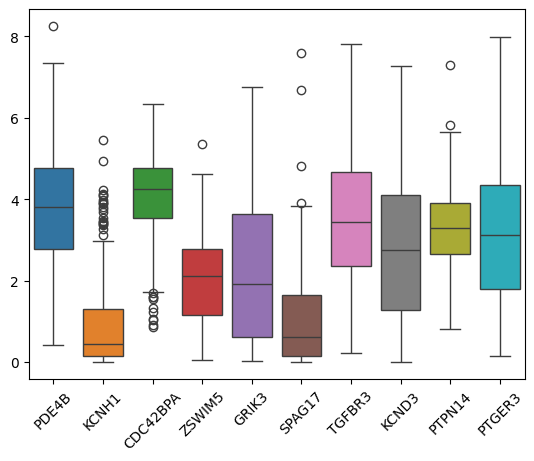

In [4]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, 
                                                    stratify = target, random_state = 42)

# Feature distritubion
plt.rcdefaults()
sns.boxplot(X_train.iloc[:, 0:10])
plt.xticks(rotation = 45)

In [5]:
# Z-score normalization on TPM-level data
# https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-021-02936-w
train_median = np.median(X_train, axis = 0)
train_std = np.std(X_train, axis = 0)

X_train_scale = (X_train - train_median) / train_std
X_test_scale = (X_test - train_median) / train_std

X_train = pd.DataFrame(X_train_scale, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, index = X_test.index, columns = X_test.columns)

In [6]:
# Select top 12 genes
select_gene = ["TMEM45B", "KCNJ11", "KRT5", "CDH3", "MAPT", "TYMS", "MYBL2", "FAM83D", "ESR1", "FOXC1", "NAT1", "SFRP1"]
X_train = X_train.loc[:, select_gene]
X_test = X_test.loc[:, select_gene]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'TMEM45B'),
  Text(1, 0, 'KCNJ11'),
  Text(2, 0, 'KRT5'),
  Text(3, 0, 'CDH3'),
  Text(4, 0, 'MAPT'),
  Text(5, 0, 'TYMS'),
  Text(6, 0, 'MYBL2'),
  Text(7, 0, 'FAM83D'),
  Text(8, 0, 'ESR1'),
  Text(9, 0, 'FOXC1'),
  Text(10, 0, 'NAT1'),
  Text(11, 0, 'SFRP1')])

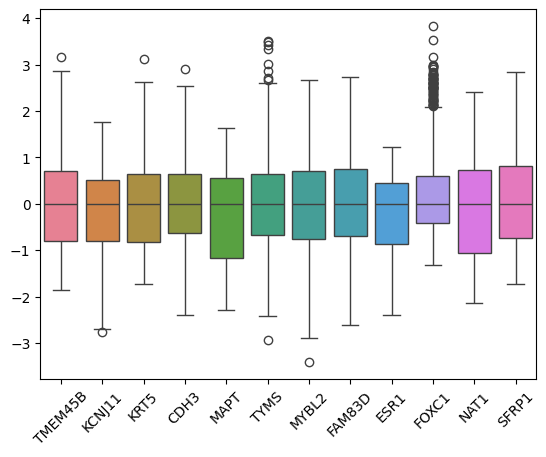

In [7]:
# Feature distritubion after normalization (Train)
plt.rcdefaults()
sns.boxplot(X_train)
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'TMEM45B'),
  Text(1, 0, 'KCNJ11'),
  Text(2, 0, 'KRT5'),
  Text(3, 0, 'CDH3'),
  Text(4, 0, 'MAPT'),
  Text(5, 0, 'TYMS'),
  Text(6, 0, 'MYBL2'),
  Text(7, 0, 'FAM83D'),
  Text(8, 0, 'ESR1'),
  Text(9, 0, 'FOXC1'),
  Text(10, 0, 'NAT1'),
  Text(11, 0, 'SFRP1')])

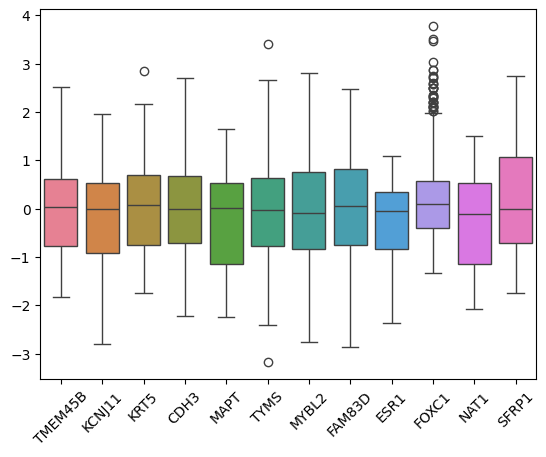

In [8]:
# Feature distritubion after normalization (Test)
plt.rcdefaults()
sns.boxplot(X_test)
plt.xticks(rotation = 45)

In [9]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
# Downsampling based on k-means cluster,
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
X_res, y_res = cc.fit_resample(X_train, y_train)

Text(0, 0.5, 'Frequency')

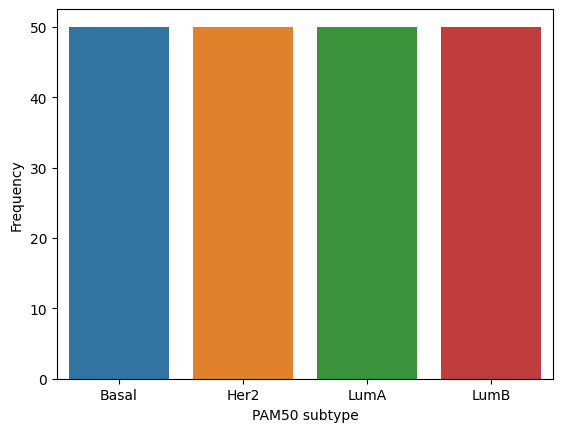

In [11]:
# Check count for each class in the training data.
plt.rcdefaults()
class_counts = pd.Series(y_res).groupby(y_res).size()
class_counts.index = ["Basal", "Her2", "LumA", "LumB"]
sns.barplot(x = class_counts.index, y = class_counts.values, hue = class_counts.index)
plt.xlabel("PAM50 subtype")
plt.ylabel("Frequency")

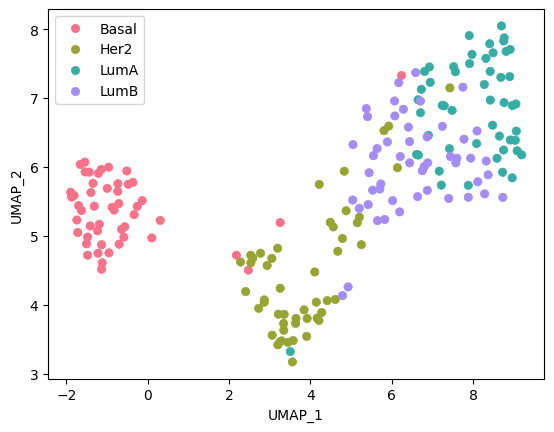

In [12]:
# Initialize UMAP
from umap import UMAP
plt.rcdefaults()

umap_2d = UMAP(n_components = 2, init = "random", random_state = 42)
proj_2d = umap_2d.fit_transform(X_res)
proj_2d = pd.DataFrame(proj_2d, columns = ["UMAP_1", "UMAP_2"])
proj_2d['PAM50'] = pd.Series(y_res).map({0: "Basal", 1: "Her2", 2: "LumA", 3: "LumB"})

# Plot using seaborn
sns.scatterplot(data = proj_2d, x = 'UMAP_1', y = 'UMAP_2', hue = 'PAM50', edgecolor = None, palette = "husl")
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(loc = 'best')	
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, make_scorer, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_validate
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from imblearn.metrics import specificity_score, sensitivity_score

# Model fitting and prediction.
model = LogisticRegression(random_state = 42, penalty = "elasticnet", solver = "saga", 
                           max_iter = 10000, C = 0.1, l1_ratio = 0.7)
model.fit(X_res, y_res)

LogisticRegression(C=0.1, l1_ratio=0.7, max_iter=10000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [14]:
# Model prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [15]:
# Classification report
print(classification_report(y_test, y_pred, target_names = ["Basal", "Her2", "LumA", "LumB"]))

              precision    recall  f1-score   support

       Basal       0.98      0.98      0.98        52
        Her2       0.78      0.86      0.82        21
        LumA       0.95      0.88      0.91       157
        LumB       0.72      0.84      0.78        56

    accuracy                           0.89       286
   macro avg       0.86      0.89      0.87       286
weighted avg       0.90      0.89      0.89       286



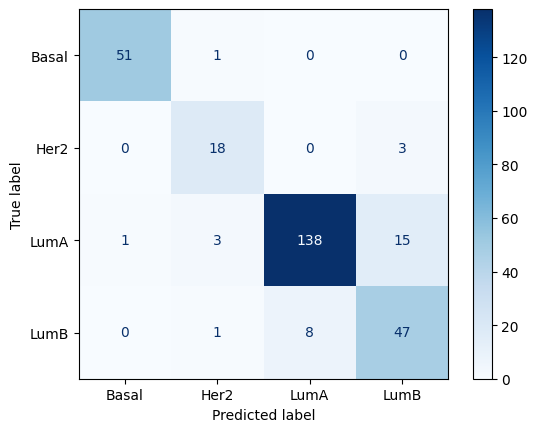

In [16]:
# Confusion matrix
plt.rcdefaults()
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                                display_labels = ["Basal", "Her2", "LumA", "LumB"],
                                                cmap = plt.cm.Blues, normalize = None)
plt.grid(False)
plt.show()

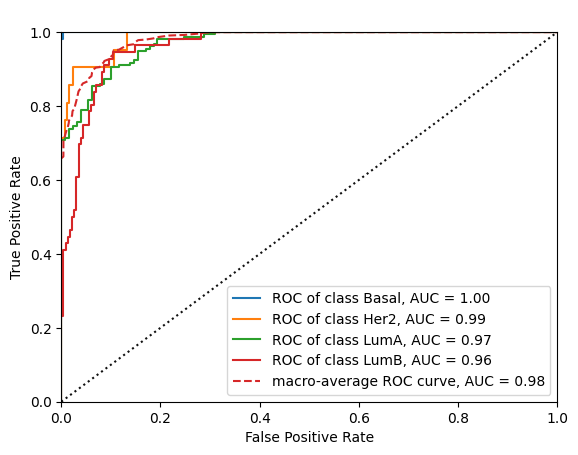

<Axes: title={'center': ' '}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
# ROC curve
plt.rcdefaults()
visualizer = ROCAUC(model, classes = ["Basal", "Her2", "LumA", "LumB"], macro = True, micro = False, title = " ")

visualizer.fit(X_res, y_res)        
visualizer.score(X_test, y_test)       
visualizer.show()

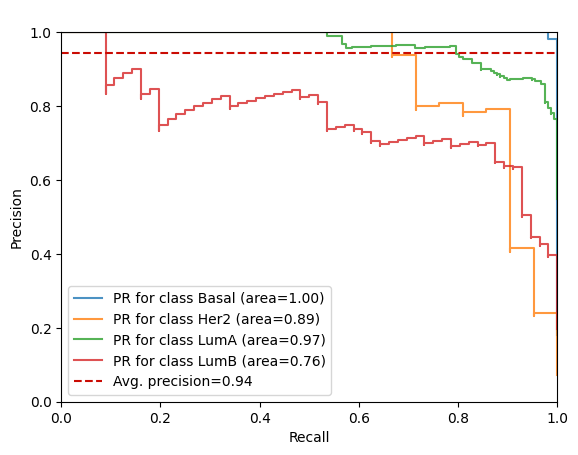

<Axes: title={'center': ' '}, xlabel='Recall', ylabel='Precision'>

In [18]:
# Precision-Recall curve
plt.rcdefaults()
visualizer = PrecisionRecallCurve(model, per_class = True, classes = ["Basal", "Her2", "LumA", "LumB"], title = " ")
visualizer.fit(X_res, y_res)        
visualizer.score(X_test, y_test)       
visualizer.show()

In [19]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8881118881118881

In [20]:
# Macro average specificity
specificity_score(y_test, y_pred, average = "macro")

0.9591455494392519

In [21]:
# Macro average sensitivity
sensitivity_score(y_test, y_pred, average = "macro")

0.8890446734793869

In [22]:
# Macro F1 score
f1_score(y_test, y_pred, average = "macro")

0.8716754105480479

In [23]:
# Macro average AUROC
roc_auc_score(y_test, y_pred_proba, multi_class = "ovr", average = "macro")

0.9800627153993268